### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 3: Classification with Logistic Regression  [ __ /100  marks]


In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. 

We will use logistic regression to predict whether subjects have diabetes or not.

## Global Toolbox

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0

## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [2]:
# ****** your code here ******
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?

**Your answer**: 
There are two classes: 0 if the patient does not have diabetes and 1 if the patient does have diabetes.

There are 8 features available to predict the outcome: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, and age.

(2) Is the dataset class-balanced?

In [7]:
# ****** your code here ******
# Number of rows with outcome 1
positive = df[df['Outcome'] == 1].shape[0]
print('Outcome = 1: '+ str(positive))

# Number of rows with outcome 0
negative = df[df['Outcome'] == 0].shape[0]
print('Outcome = 0: '+ str(negative))

Outcome = 1: 268
Outcome = 0: 500


**Your answer**: 
No, the dataset is not class balanced as there are significantly more negative outcomes than there are positive outcomes.

(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.

In [13]:
# ****** your code here ******


baseline_accuracy = negative / (positive + negative)
print("Baseline Accuracy is: {:.3f}".format(baseline_accuracy))

Baseline Accuracy is: 0.651


I interpret the baseline accuracy of 0.651 as the floor for a successful model to beat. If a model can't outperform this baseline accuracy, then it is doing worse than if it were to not even attempt to fit the data.

## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.

In [20]:
# Store all the features into variable "X"
# ****** your code here ******
X = df.drop('Outcome', axis='columns')

# Store the output class values into variable "y" 
# ****** your code here ******
y = df.Outcome.values

# Split your X and y data using train_test_split 
# ****** your code here ******
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**: 


    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**: 


    
(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: 

## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.

c:\Users\Riley\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


<Axes: xlabel='Insulin', ylabel='Outcome'>

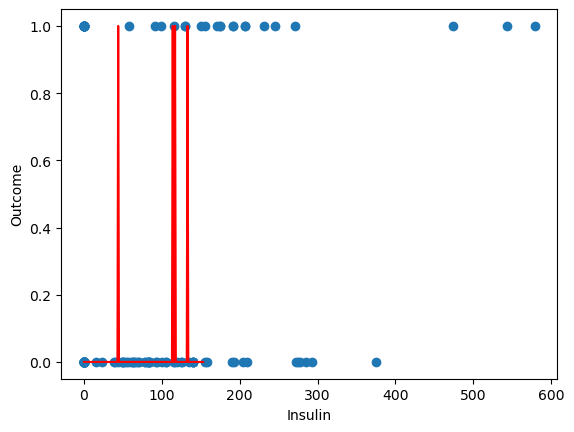

In [30]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
lr = LogisticRegression(penalty='none')

# Fit to your training data using Logistic Regression 
# ****** your code here ******
fit = lr.fit(Xtrain[['Insulin']], ytrain)

# Create a scatter plot of the test data. 
# ****** your code here ******
plt.scatter(Xtest[['Insulin']], ytest)
plt.xlabel('Insulin')
plt.ylabel('Outcome')

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector xplot

## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [ ]:
# ****** your code here ******
# You can either write a function or not



## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [ ]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******


# Fit to your training data using Logistic Regression 
# ****** your code here ******


# Compute your test predictions, given test inputs 
# ****** your code here ******


# Evaluate the performance
# ****** your code here ******


Does using more features help to improve the classification?

**Your answer** : 

## Question 3.2 [ _ /10 marks]
Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.

In [ ]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.4


# Evaluate the performance
# ****** your code here ******


In [ ]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.6



# Evaluate the performance
# ****** your code here ******


What do you think is a better threshold? 

**Your answer**: 

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [ ]:
# Create a LogisticRegression model with l2 regularization 
# ****** your code here ******


# Fit to your training data using Logistic Regression 
# ****** your code here ******

# Compute your test predictions, given test inputs 
# ****** your code here ******


# Evaluate the performance
# ****** your code here ******


Does regularization help to improve the classification?

**Your answer** : 

## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.

In [ ]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers 
# ****** your code here ******


# Plot all of the ROC curves 
# ****** your code here ******


# Determine AUC for each of the ROC curves 
# ****** your code here ******


Which one is the best classifier?

**Your answer**: 

## Question 5 [ _ /10 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass **Logistic Regression** using the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  with `l2` regularization. So, this time you will have 10 classes, *i.e.*, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel and speed up computations. A good value for N can be the number of physical CPU cores that your machine possesses (`N=-1` would use all cores). Check the documentations of the functions to take advantage from this where possible.

First load the data and plot a histogram to comment on class distribution qualitatively. For splitting the data into train and test sets, use `test_size=0.5` and `random_state=seed`. What is the balanced accuracy score of your model?

In [ ]:
### your stuff

**Your written answer**: 

## Question 6 [ _ /10 marks]

Run the cell below to see how well your model can recognize a digit drawn by the mouse cursor. Set the variable `final_model`, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the model's recognition of your input.

Despite the cell using your classifier, which has a high balanced accuracy score, it often makes mistakes and its performance seems questionable. Try to explain in words why is that so?

Caveat: The cell below will not run on headless servers, you will need to use a local installation of python. You might have some fun until you can get it to work, but that's ok, because I want you to try your hands on technicalities and not always rely on online services.

In [ ]:
final_model=? # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')

**Your answer**: 